<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta, date, time
from time import strftime
import os

col_result = 'HDA_RESULT'

curr_path = os.getcwd()
csv_name = 'str_asian_075.csv'
output_file = '%s\\data\\%s' % (curr_path,csv_name)
error_file = '%s\\error.txt' % (curr_path)
if os.path.exists(error_file):
    os.remove(error_file)
    

current_match_date = datetime.now()
current_time = datetime.now().time()
if current_time >= time(0,0) and current_time <= time(11, 30):
    previous_day = current_match_date - timedelta(days=1)
    current_match_date = previous_day
db_match_date = current_match_date.strftime("%Y%m%d")
current_match_date = current_match_date.strftime("%Y-%m-%d 11:30:00")


print('Execution time: %s' % strftime('%Y-%m-%d %H:%M:%S'))
print('Match date: %s' % current_match_date)

Execution time: 2020-10-08 01:08:40
Match date: 2020-10-07 11:30:00


In [2]:
import cx_Oracle
import codecs

db_user = 'JW'
db_password = '901203'
db_dsn = 'HOME-PC/XE'
db_encoding = 'UTF-8'

# Database connection
connection = None
try:
    connection = cx_Oracle.connect(
        db_user,
        db_password,
        db_dsn,
        encoding=db_encoding)

    c = connection.cursor()
    
    if os.path.exists(output_file):
        os.remove(output_file)
    
    file = codecs.open(output_file, "a+", "utf-8")

    # write file header
    file.write('MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,HDA_RESULT,ML_TYPE,STR_OU_MODE_HDC,STR_OU_AVG_HI,STR_OU_AVG_LO,STR_OU_BET365_HDC,STR_OU_BET365_HI,STR_OU_BET365_LO,STR_OU_YINGWO_HDC,STR_OU_YINGWO_HI,STR_OU_YINGWO_LO,STR_OU_PINNACLE_HDC,STR_OU_PINNACLE_HI,STR_OU_PINNACLE_LO,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,STR_A_MODE_HDC,STR_A_AVG_H,STR_A_AVG_A,STR_A_BET365_HDC,STR_A_BET365_H,STR_A_BET365_A,STR_A_YINGWO_HDC,STR_A_YINGWO_H,STR_A_YINGWO_A,STR_A_PINNACLE_HDC,STR_A_PINNACLE_H,STR_A_PINNACLE_A,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_A_HKJC_HDC,STR_A_HKJC_H,STR_A_HKJC_A,STR_A_BET365_H_DIFF,STR_A_BET365_A_DIFF,STR_A_YINGWO_H_DIFF,STR_A_YINGWO_A_DIFF,STR_A_PINNACLE_H_DIFF,STR_A_PINNACLE_A_DIFF,STR_A_MACAU_H_DIFF,STR_A_MACAU_A_DIFF,STR_A_HKJC_H_DIFF,STR_A_HKJC_A_DIFF,STR_HDA_AVG_H,STR_HDA_AVG_D,STR_HDA_AVG_A,STR_HDA_BET365_H,STR_HDA_BET365_D,STR_HDA_BET365_A,STR_HDA_YINGWO_H,STR_HDA_YINGWO_D,STR_HDA_YINGWO_A,STR_HDA_PINNACLE_H,STR_HDA_PINNACLE_D,STR_HDA_PINNACLE_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,STR_HDA_BET365_H_DIFF,STR_HDA_BET365_D_DIFF,STR_HDA_BET365_A_DIFF,STR_HDA_YINGWO_H_DIFF,STR_HDA_YINGWO_D_DIFF,STR_HDA_YINGWO_A_DIFF,STR_HDA_PINNACLE_H_DIFF,STR_HDA_PINNACLE_D_DIFF,STR_HDA_PINNACLE_A_DIFF,STR_HDA_MACAU_H_DIFF,STR_HDA_MACAU_D_DIFF,STR_HDA_MACAU_A_DIFF,STR_HDA_HKJC_H_DIFF,STR_HDA_HKJC_D_DIFF,STR_HDA_HKJC_A_DIFF,HOME_TOTAL_GF,HOME_TOTAL_GA,HOME_AVG_GF,HOME_HOME_GF,HOME_HOME_GA,HOME_HOME_AVG_GF,AWAY_TOTAL_GF,AWAY_TOTAL_GA,AWAY_AVG_GF,AWAY_AWAY_GF,AWAY_AWAY_GA,AWAY_AWAY_AVG_GF,HOME_ADV,AWAY_ADV,GAME_POINT,HOME_WIN_RATE,HOME_DRAW_RATE,HOME_LOSE_RATE,HOME_HOME_WIN_RATE,HOME_HOME_LOSE_RATE,HOME_HOME_DRAW_RATE,AWAY_WIN_RATE,AWAY_DRAW_RATE,AWAY_LOSE_RATE,AWAY_AWAY_WIN_RATE,AWAY_AWAY_LOSE_RATE,AWAY_AWAY_DRAW_RATE\n')
    sql = """
        SELECT 
            -- INFO
            info.MATCH_ID, info.MATCH_DATETIME, info.LEAGUE, info.HOME_TEAM, info.AWAY_TEAM, info.HOME_FT_GOAL, info.AWAY_FT_GOAL, 
            CASE 
                WHEN info.HOME_FT_GOAL>info.AWAY_FT_GOAL THEN 'H'
                WHEN info.HOME_FT_GOAL<=info.AWAY_FT_GOAL THEN 'A'
                ELSE 'P'
            END AS HDA_RESULT,
            CASE 
                WHEN info.MATCH_DATETIME < TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TRAIN'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'VALID'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') THEN 'TEST'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') THEN 'PREDICT'
            END AS ML_TYPE, 
            -- HILO
            hilo.STR_MODE_HDC AS STR_OU_MODE_HDC, ROUND(hilo.STR_O_AVG_HI,4) AS STR_OU_AVG_HI, ROUND(hilo.STR_O_AVG_LO,4) AS STR_OU_AVG_LO, 
            hilo.STR_BET365_HDC AS STR_OU_BET365_HDC, hilo.STR_O_BET365_HI AS STR_OU_BET365_HI, hilo.STR_O_BET365_LO AS STR_OU_BET365_LO, 
            hilo.STR_YINGYO_HDC AS STR_OU_YINGWO_HDC, hilo.STR_O_YINGYO_HI AS STR_OU_YINGWO_HI, hilo.STR_O_YINGYO_LO AS STR_OU_YINGWO_LO, 
            hilo.STR_PINGBOK_HDC AS STR_OU_PINNACLE_HDC, hilo.STR_O_PINGBOK_HI AS STR_OU_PINNACLE_HI, hilo.STR_O_PINGBOK_LO AS STR_OU_PINNACLE_LO, 
            hilo.STR_MACAU_HDC AS STR_OU_MACAU_HDC, hilo.STR_O_MACAU_HI AS STR_OU_MACAU_HI, hilo.STR_O_MACAU_LO AS STR_OU_MACAU_LO, 
            hilo.STR_HKJC_HDC AS STR_OU_HKJC_HDC, hilo.STR_O_HKJC_HI AS STR_OU_HKJC_HI, hilo.STR_O_HKJC_LO AS STR_OU_HKJC_LO, 
            -- ASIAN
            asian.STR_MODE_HDC AS STR_A_MODE_HDC, ROUND(asian.STR_O_AVG_HOME,4) AS STR_A_AVG_H, ROUND(asian.STR_O_AVG_AWAY,4) AS STR_A_AVG_A, 
            asian.STR_BET365_HDC AS STR_A_BET365_HDC, asian.STR_O_BET365_H AS STR_A_BET365_H, asian.STR_O_BET365_A AS STR_A_BET365_A, 
            asian.STR_YINGYO_HDC AS STR_A_YINGWO_HDC, asian.STR_O_YINGYO_H AS STR_A_YINGWO_H, asian.STR_O_YINGYO_A AS STR_A_YINGWO_A, 
            asian.STR_PINGBOK_HDC AS STR_A_PINNACLE_HDC, asian.STR_O_PINGBOK_H AS STR_A_PINNACLE_H, asian.STR_O_PINGBOK_A AS STR_A_PINNACLE_A, 
            asian.STR_MACAU_HDC AS STR_A_MACAU_HDC, asian.STR_O_MACAU_H AS STR_A_MACAU_H, asian.STR_O_MACAU_A AS STR_A_MACAU_A, 
            asian.STR_HKJC_HDC AS STR_A_HKJC_HDC, asian.STR_O_HKJC_H AS STR_A_HKJC_H, asian.STR_O_HKJC_A AS STR_A_HKJC_A, 
            -- ASIAN DIFF
            ROUND((asian.STR_O_BET365_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_BET365_H_DIFF, ROUND((asian.STR_O_BET365_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_BET365_A_DIFF, 
            ROUND((asian.STR_O_YINGYO_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_YINGWO_H_DIFF, ROUND((asian.STR_O_YINGYO_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_YINGWO_A_DIFF, 
            ROUND((asian.STR_O_PINGBOK_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_PINNACLE_H_DIFF, ROUND((asian.STR_O_PINGBOK_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_PINNACLE_A_DIFF, 
            ROUND((asian.STR_O_MACAU_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_MACAU_H_DIFF, ROUND((asian.STR_O_MACAU_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_MACAU_A_DIFF, 
            ROUND((asian.STR_O_HKJC_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_HKJC_H_DIFF, ROUND((asian.STR_O_HKJC_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_HKJC_A_DIFF, 
            -- HDA
            hda.HOME_MEAN AS STR_HDA_AVG_H, hda.DRAW_MEAN AS STR_HDA_AVG_D, hda.AWAY_MEAN AS STR_HDA_AVG_A, 
            bet365.HOME_ODD AS STR_HDA_BET365_H, bet365.DRAW_ODD AS STR_HDA_BET365_D, bet365.AWAY_ODD AS STR_HDA_BET365_A, 
            yingwo.HOME_ODD AS STR_HDA_YINGWO_H, yingwo.DRAW_ODD AS STR_HDA_YINGWO_D, yingwo.AWAY_ODD AS STR_HDA_YINGWO_A, 
            pinnacle.HOME_ODD AS STR_HDA_PINNACLE_H, pinnacle.DRAW_ODD AS STR_HDA_PINNACLE_D, pinnacle.AWAY_ODD AS STR_HDA_PINNACLE_A, 
            macau.HOME_ODD AS STR_HDA_MACAU_H, macau.DRAW_ODD AS STR_HDA_MACAU_D, macau.AWAY_ODD AS STR_HDA_MACAU_A, 
            hkjc.HOME_ODD AS STR_HDA_HKJC_H, hkjc.DRAW_ODD AS STR_HDA_HKJC_D, hkjc.AWAY_ODD AS STR_HDA_HKJC_A, 
            -- HDA DIFF
            ROUND((bet365.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_BET365_H_DIFF, ROUND((bet365.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_BET365_D_DIFF, ROUND((bet365.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_BET365_A_DIFF, 
            ROUND((yingwo.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_YINGWO_H_DIFF, ROUND((yingwo.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_YINGWO_D_DIFF, ROUND((yingwo.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_YINGWO_A_DIFF, 
            ROUND((pinnacle.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_PINNACLE_H_DIFF, ROUND((pinnacle.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_PINNACLE_D_DIFF, ROUND((pinnacle.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_PINNACLE_A_DIFF, 
            ROUND((macau.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_MACAU_H_DIFF, ROUND((macau.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_MACAU_D_DIFF, ROUND((macau.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_MACAU_A_DIFF, 
            ROUND((hkjc.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_HKJC_H_DIFF, ROUND((hkjc.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_HKJC_D_DIFF, ROUND((hkjc.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_HKJC_A_DIFF, 
            -- RECENT STAT
            recent.HOME_TOTAL_GF, recent.HOME_TOTAL_GA, recent.HOME_AVG_GF, recent.HOME_HOME_GF, recent.HOME_HOME_GA, recent.HOME_HOME_AVG_GF, 
            recent.AWAY_TOTAL_GF, recent.AWAY_TOTAL_GA, recent.AWAY_AVG_GF, recent.AWAY_AWAY_GF, recent.AWAY_AWAY_GA, recent.AWAY_AWAY_AVG_GF, 
            (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 AS HOME_ADV, (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS AWAY_ADV, (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS GAME_POINT,
            recent.HOME_WIN_RATE, recent.HOME_DRAW_RATE, recent.HOME_LOSE_RATE, recent.HOME_HOME_WIN_RATE, recent.HOME_HOME_LOSE_RATE, recent.HOME_HOME_DRAW_RATE, 
            recent.AWAY_WIN_RATE, recent.AWAY_DRAW_RATE, recent.AWAY_LOSE_RATE, recent.AWAY_AWAY_WIN_RATE, recent.AWAY_AWAY_LOSE_RATE, recent.AWAY_AWAY_DRAW_RATE
        FROM 
            MATCH_INFO info, HILO_MERGE2 hilo, ASIAN_MERGE asian, RECENT_RAW recent, HDA_MEAN_MEDIAN hda, HDA_RAW macau, HDA_RAW bet365, HDA_RAW yingwo, HDA_RAW pinnacle, HDA_RAW hkjc
        WHERE 
            info.MATCH_ID=hilo.MATCH_ID AND info.MATCH_ID=asian.MATCH_ID AND info.MATCH_ID=recent.MATCH_ID AND info.MATCH_ID=hda.MATCH_ID AND info.MATCH_ID=macau.MATCH_ID AND info.MATCH_ID=bet365.MATCH_ID AND info.MATCH_ID=yingwo.MATCH_ID AND info.MATCH_ID=pinnacle.MATCH_ID AND info.MATCH_ID=hkjc.MATCH_ID 
            AND macau.BOOKMAKER='澳门' AND bet365.BOOKMAKER='bet365' AND yingwo.BOOKMAKER='盈禾' AND pinnacle.BOOKMAKER='Pinnacle' AND hkjc.BOOKMAKER='香港马会' 
            AND macau.HANDICAP_TYPE=0 AND bet365.HANDICAP_TYPE=0 AND yingwo.HANDICAP_TYPE=0 AND pinnacle.HANDICAP_TYPE=0 AND hkjc.HANDICAP_TYPE=0 
            AND hda.HANDICAP_TYPE=0
            --AND hkjc.HOME_ODD>=1.6 AND hkjc.AWAY_ODD>=1.6
            AND asian.STR_MODE_HDC=0.75
            AND info.LEAGUE NOT IN ('歐國聯','欧青U21外')
            AND (info.MATCH_DATETIME >= TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') OR (info.MATCH_DATETIME < TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') AND info.HOME_FT_GOAL IS NOT NULL))
        ORDER BY info.MATCH_DATETIME, info.MATCH_ID
        """ % (current_match_date, current_match_date, current_match_date, current_match_date)

    c.execute(sql)
    result = c.fetchall()
    for row in result:
        ft_home_goal = row[5]
        ft_away_goal = row[6]
        total_goal = row[7]
        if row[5] == None:
            ft_home_goal = ''
        if row[6] == None:
            ft_away_goal = ''
        if row[7] == None:
            total_goal = ''
        file.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (row[0], row[1], row[2], row[3], row[4], ft_home_goal, ft_away_goal, total_goal, row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], row[16], row[17], row[18], row[19], row[20], row[21], row[22], row[23], row[24], row[25], row[26], row[27], row[28], row[29], row[30], row[31], row[32], row[33], row[34], row[35], row[36], row[37], row[
                   38], row[39], row[40], row[41], row[42], row[43], row[44], row[45], row[46], row[47], row[48], row[49], row[50], row[51], row[52], row[53], row[54], row[55], row[56], row[57], row[58], row[59], row[60], row[61], row[62], row[63], row[64], row[65], row[66], row[67], row[68], row[69], row[70], row[71], row[72], row[73], row[74], row[75], row[76], row[77], row[78], row[79], row[80], row[81], row[82], row[83], row[84], row[85], row[86], row[87], row[88], row[89], row[90], row[91], row[92], row[93], row[94], row[95], row[96], row[97], row[98], row[99], row[100], row[101], row[102], row[103], row[104], row[105], row[106], row[107], row[108], row[109], row[110], row[111], row[112], row[113], row[114]))

    file.close()

except cx_Oracle.Error as error:
    file.close()
    err_file = codecs.open(error_file, 'a+', 'utf-8')
    err_file.write('[%s] Oracle error - %s\n' %
                   (strftime('%Y-%m-%d %H:%M:%S'), error))
    err_file.close()
except:
    file.close()


In [3]:
import pandas as pd
from datetime import datetime

In [4]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [5]:
#load datasets
df = pd.read_csv('data/%s' % csv_name, sep=',')

In [6]:
# df.dtypes

In [7]:
# #final feature selection
df = df[['MATCH_ID', 'MATCH_DATETIME', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'HDA_RESULT', 'ML_TYPE', 'STR_OU_MODE_HDC', 'STR_OU_AVG_HI', 'STR_OU_AVG_LO', 'STR_OU_BET365_HDC', 'STR_OU_BET365_HI', 'STR_OU_BET365_LO', 'STR_OU_YINGWO_HDC', 'STR_OU_YINGWO_HI', 'STR_OU_YINGWO_LO', 'STR_OU_PINNACLE_HDC', 'STR_OU_PINNACLE_HI', 'STR_OU_PINNACLE_LO', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'STR_A_MODE_HDC', 'STR_A_AVG_H', 'STR_A_AVG_A', 'STR_A_BET365_HDC', 'STR_A_BET365_H', 'STR_A_BET365_A', 'STR_A_YINGWO_HDC', 'STR_A_YINGWO_H', 'STR_A_YINGWO_A', 'STR_A_PINNACLE_HDC', 'STR_A_PINNACLE_H', 'STR_A_PINNACLE_A', 'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', 'STR_A_BET365_H_DIFF', 'STR_A_BET365_A_DIFF', 'STR_A_YINGWO_H_DIFF', 'STR_A_YINGWO_A_DIFF', 'STR_A_PINNACLE_H_DIFF', 'STR_A_PINNACLE_A_DIFF', 'STR_A_MACAU_H_DIFF', 'STR_A_MACAU_A_DIFF', 'STR_A_HKJC_H_DIFF', 'STR_A_HKJC_A_DIFF', 'STR_HDA_AVG_H', 'STR_HDA_AVG_D', 'STR_HDA_AVG_A', 'STR_HDA_BET365_H', 'STR_HDA_BET365_D',
         'STR_HDA_BET365_A', 'STR_HDA_YINGWO_H', 'STR_HDA_YINGWO_D', 'STR_HDA_YINGWO_A', 'STR_HDA_PINNACLE_H', 'STR_HDA_PINNACLE_D', 'STR_HDA_PINNACLE_A', 'STR_HDA_MACAU_H', 'STR_HDA_MACAU_D', 'STR_HDA_MACAU_A', 'STR_HDA_HKJC_H', 'STR_HDA_HKJC_D', 'STR_HDA_HKJC_A', 'STR_HDA_BET365_H_DIFF', 'STR_HDA_BET365_D_DIFF', 'STR_HDA_BET365_A_DIFF', 'STR_HDA_YINGWO_H_DIFF', 'STR_HDA_YINGWO_D_DIFF', 'STR_HDA_YINGWO_A_DIFF', 'STR_HDA_PINNACLE_H_DIFF', 'STR_HDA_PINNACLE_D_DIFF', 'STR_HDA_PINNACLE_A_DIFF', 'STR_HDA_MACAU_H_DIFF', 'STR_HDA_MACAU_D_DIFF', 'STR_HDA_MACAU_A_DIFF', 'STR_HDA_HKJC_H_DIFF', 'STR_HDA_HKJC_D_DIFF', 'STR_HDA_HKJC_A_DIFF', 'HOME_TOTAL_GF', 'HOME_TOTAL_GA', 'HOME_AVG_GF', 'HOME_HOME_GF', 'HOME_HOME_GA', 'HOME_HOME_AVG_GF', 'AWAY_TOTAL_GF', 'AWAY_TOTAL_GA', 'AWAY_AVG_GF', 'AWAY_AWAY_GF', 'AWAY_AWAY_GA', 'AWAY_AWAY_AVG_GF', 'HOME_ADV', 'AWAY_ADV', 'GAME_POINT', 'HOME_WIN_RATE', 'HOME_DRAW_RATE', 'HOME_LOSE_RATE', 'HOME_HOME_WIN_RATE', 'HOME_HOME_LOSE_RATE', 'HOME_HOME_DRAW_RATE', 'AWAY_WIN_RATE', 'AWAY_DRAW_RATE', 'AWAY_LOSE_RATE', 'AWAY_AWAY_WIN_RATE', 'AWAY_AWAY_LOSE_RATE', 'AWAY_AWAY_DRAW_RATE']]

In [8]:
# df.isnull().sum()

In [9]:
# df.tail()

In [10]:
df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','STR_A_HKJC_HDC','STR_A_HKJC_H','STR_A_HKJC_A','STR_A_HKJC_H_DIFF','STR_A_HKJC_A_DIFF'], axis=1)
# df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL'], axis=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
#Split train and test datasets

X = df1
X_train = df1.query('ML_TYPE == "TRAIN"')
X_val = df1.query('ML_TYPE == "VALID"')
X_test = df1.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')
y_train = X_train.pop(col_result)
y_val = X_val.pop(col_result)
y_test = X_test.pop(col_result)

In [13]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(440, 102)
(131, 102)
(126, 102)
(440,)
(131,)
(126,)


In [14]:
# Baseline
y_train.value_counts(normalize=True)

H    0.570455
A    0.429545
Name: HDA_RESULT, dtype: float64

In [15]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
# import eli5
# from eli5.sklearn import PermutationImportance

# permuter = PermutationImportance(
#     model,
#     scoring='accuracy',
#     n_iter=5,
#     random_state=42
# )

# permuter.fit(X_val_transformed, y_val)

In [17]:
# eli5.show_weights(
#     permuter,
#     top=None,
#     feature_names=X_test.columns.tolist()
# )

In [18]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

# print(y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=-1, num_parallel_tree

In [19]:
print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 1.0
Validation Accuracy: 0.5267175572519084
Test Accuracy: 0.5238095238095238


In [20]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.48091603053435117
test accuracy: 0.5634920634920635


In [21]:
# # Get feature importances
# rf = model2.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, X_train.columns)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# n = 12
# plt.figure(figsize=(5,10))
# plt.title(f'Top {n} features')
# importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [22]:
# print(importances.sort_values())

In [23]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=2300, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.6409090909090909
Validation Accuracy: 0.5190839694656488
Test Accuracy: 0.5317460317460317


In [24]:
# remove negative features
X_train = X_train[['STR_A_MACAU_H', 'STR_A_AVG_A', 'STR_HDA_YINGWO_H_DIFF', 'STR_HDA_PINNACLE_H', 'HOME_HOME_LOSE_RATE', 'AWAY_AVG_GF', 'STR_A_YINGWO_H_DIFF', 'STR_HDA_PINNACLE_A_DIFF', 'STR_OU_PINNACLE_LO', 'STR_HDA_YINGWO_H', 'STR_A_BET365_H', 'AWAY_AWAY_GA', 'STR_HDA_YINGWO_A', 'STR_OU_AVG_LO', 'STR_A_MACAU_A_DIFF', 'AWAY_AWAY_LOSE_RATE', 'STR_HDA_PINNACLE_D_DIFF', 'STR_HDA_HKJC_H', 'STR_A_MACAU_HDC', 'STR_HDA_PINNACLE_D', 'STR_A_PINNACLE_H', 'STR_HDA_BET365_A_DIFF', 'STR_A_PINNACLE_A',
                   'HOME_WIN_RATE', 'STR_OU_HKJC_LO', 'STR_A_MACAU_H_DIFF', 'STR_OU_YINGWO_HDC', 'STR_HDA_YINGWO_D', 'STR_HDA_MACAU_D_DIFF', 'AWAY_TOTAL_GF', 'STR_HDA_AVG_H', 'STR_A_YINGWO_A_DIFF', 'AWAY_AWAY_WIN_RATE', 'STR_HDA_BET365_D', 'AWAY_AWAY_GF', 'AWAY_LOSE_RATE', 'STR_HDA_BET365_D_DIFF', 'STR_HDA_HKJC_H_DIFF', 'STR_HDA_HKJC_A_DIFF', 'STR_A_BET365_A_DIFF', 'STR_A_MACAU_A', 'AWAY_AWAY_DRAW_RATE', 'HOME_AVG_GF', 'ML_TYPE', 'STR_A_YINGWO_HDC', 'STR_OU_YINGWO_LO', 'STR_A_MODE_HDC']]
X_val = X_val[['STR_A_MACAU_H', 'STR_A_AVG_A', 'STR_HDA_YINGWO_H_DIFF', 'STR_HDA_PINNACLE_H', 'HOME_HOME_LOSE_RATE', 'AWAY_AVG_GF', 'STR_A_YINGWO_H_DIFF', 'STR_HDA_PINNACLE_A_DIFF', 'STR_OU_PINNACLE_LO', 'STR_HDA_YINGWO_H', 'STR_A_BET365_H', 'AWAY_AWAY_GA', 'STR_HDA_YINGWO_A', 'STR_OU_AVG_LO', 'STR_A_MACAU_A_DIFF', 'AWAY_AWAY_LOSE_RATE', 'STR_HDA_PINNACLE_D_DIFF', 'STR_HDA_HKJC_H', 'STR_A_MACAU_HDC', 'STR_HDA_PINNACLE_D', 'STR_A_PINNACLE_H', 'STR_HDA_BET365_A_DIFF', 'STR_A_PINNACLE_A',
               'HOME_WIN_RATE', 'STR_OU_HKJC_LO', 'STR_A_MACAU_H_DIFF', 'STR_OU_YINGWO_HDC', 'STR_HDA_YINGWO_D', 'STR_HDA_MACAU_D_DIFF', 'AWAY_TOTAL_GF', 'STR_HDA_AVG_H', 'STR_A_YINGWO_A_DIFF', 'AWAY_AWAY_WIN_RATE', 'STR_HDA_BET365_D', 'AWAY_AWAY_GF', 'AWAY_LOSE_RATE', 'STR_HDA_BET365_D_DIFF', 'STR_HDA_HKJC_H_DIFF', 'STR_HDA_HKJC_A_DIFF', 'STR_A_BET365_A_DIFF', 'STR_A_MACAU_A', 'AWAY_AWAY_DRAW_RATE', 'HOME_AVG_GF', 'ML_TYPE', 'STR_A_YINGWO_HDC', 'STR_OU_YINGWO_LO', 'STR_A_MODE_HDC']]
X_test = X_test[['STR_A_MACAU_H', 'STR_A_AVG_A', 'STR_HDA_YINGWO_H_DIFF', 'STR_HDA_PINNACLE_H', 'HOME_HOME_LOSE_RATE', 'AWAY_AVG_GF', 'STR_A_YINGWO_H_DIFF', 'STR_HDA_PINNACLE_A_DIFF', 'STR_OU_PINNACLE_LO', 'STR_HDA_YINGWO_H', 'STR_A_BET365_H', 'AWAY_AWAY_GA', 'STR_HDA_YINGWO_A', 'STR_OU_AVG_LO', 'STR_A_MACAU_A_DIFF', 'AWAY_AWAY_LOSE_RATE', 'STR_HDA_PINNACLE_D_DIFF', 'STR_HDA_HKJC_H', 'STR_A_MACAU_HDC', 'STR_HDA_PINNACLE_D', 'STR_A_PINNACLE_H', 'STR_HDA_BET365_A_DIFF', 'STR_A_PINNACLE_A',
                 'HOME_WIN_RATE', 'STR_OU_HKJC_LO', 'STR_A_MACAU_H_DIFF', 'STR_OU_YINGWO_HDC', 'STR_HDA_YINGWO_D', 'STR_HDA_MACAU_D_DIFF', 'AWAY_TOTAL_GF', 'STR_HDA_AVG_H', 'STR_A_YINGWO_A_DIFF', 'AWAY_AWAY_WIN_RATE', 'STR_HDA_BET365_D', 'AWAY_AWAY_GF', 'AWAY_LOSE_RATE', 'STR_HDA_BET365_D_DIFF', 'STR_HDA_HKJC_H_DIFF', 'STR_HDA_HKJC_A_DIFF', 'STR_A_BET365_A_DIFF', 'STR_A_MACAU_A', 'AWAY_AWAY_DRAW_RATE', 'HOME_AVG_GF', 'ML_TYPE', 'STR_A_YINGWO_HDC', 'STR_OU_YINGWO_LO', 'STR_A_MODE_HDC']]


In [25]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.975
Validation Accuracy: 0.4961832061068702
Test Accuracy: 0.5317460317460317


In [26]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5267175572519084
test accuracy: 0.49206349206349204


In [27]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
# import eli5
# from eli5.sklearn import PermutationImportance

# permuter = PermutationImportance(
#     model,
#     scoring='accuracy',
#     n_iter=5,
#     random_state=42
# )

# permuter.fit(X_val_transformed, y_val)

In [29]:
# eli5.show_weights(
#     permuter,
#     top=None,
#     feature_names=X_test.columns.tolist()
# )

In [30]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=2300, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.6272727272727273
Validation Accuracy: 0.5267175572519084
Test Accuracy: 0.48412698412698413


In [31]:
import matplotlib.pyplot as plt


In [32]:
# #Confusion graph
# from sklearn.metrics import plot_confusion_matrix, classification_report

# plt.rcParams['figure.dpi'] = 100
# plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [33]:
# df1.tail()

In [34]:
# test = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', col_result]]
test = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL',
            'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 
            'STR_HDA_MACAU_H', 'STR_HDA_MACAU_D', 'STR_HDA_MACAU_A',
            'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', 
            'STR_HDA_HKJC_H', 'STR_HDA_HKJC_D', 'STR_HDA_HKJC_A', col_result]]


test = test.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')

In [35]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['probA','probH'])

test.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

test_result = pd.concat([test, prob, pred], axis=1)


In [36]:
# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob0'] >= 0.6:
#         print(fin.loc[[i]])
#         print('%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s' % (fin.loc[i, 'MATCH_DATETIME'],fin.loc[i, 'HOME_TEAM'],fin.loc[i, 'AWAY_TEAM'],fin.loc[i, 'HOME_FT_GOAL'],fin.loc[i, 'AWAY_FT_GOAL'],fin.loc[i, 'STR_HKJC_HILO_HANDICAP'],fin.loc[i, 'STR_HKJC_HILO_HI'],fin.loc[i, 'STR_HKJC_HILO_LO'],fin.loc[i, 'TOTAL_GOAL_COUNT'],fin.loc[i, 'OU25'],fin.loc[i, 'prob0'],fin.loc[i, 'prob1'],fin.loc[i, 'pred']))

In [37]:
test_result['Correct'] = (test_result[col_result] == test_result['pred']).astype(int)


In [38]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [39]:
# hdc_col = 'STR_A_MACAU_HDC'
h_col = 'STR_HDA_MACAU_H'
d_col = 'STR_HDA_MACAU_D'
a_col = 'STR_HDA_MACAU_A'
# hkjc_hdc = 2.5

In [40]:
#betting on every single match
money = []
count = 0 

for i,j in test_result.iterrows():
  if test_result.loc[i, 'Correct'] == 1:
    if test_result.loc[i, col_result] == 'H':
      count = (count + (100*test_result.loc[i, h_col])-100)
      money.append(count)
    elif test_result.loc[i, col_result] == 'A':
        if test_result.loc[i, 'HOME_FT_GOAL'] == test_result.loc[i, 'AWAY_FT_GOAL']:
          count = (count + (50*test_result.loc[i, d_col])-100)
          money.append(count)
        elif test_result.loc[i, 'HOME_FT_GOAL'] < test_result.loc[i, 'AWAY_FT_GOAL']:
          count = (count + (50*test_result.loc[i, a_col])-100)
          money.append(count)
  else:
    count = count - 100
    money.append(count)
    
test_result.loc[:, 'Model1'] = pd.Series(money)

In [41]:
#betting on every over (baseline)
money = []
count = 0 

for i,j in test_result.iterrows():
    if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, h_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
    
test_result.loc[:, 'Baseline'] = pd.Series(money)

In [42]:
test_result[col_result].value_counts(normalize=True)

H    0.547619
A    0.420635
P    0.031746
Name: HDA_RESULT, dtype: float64

In [43]:
# fin

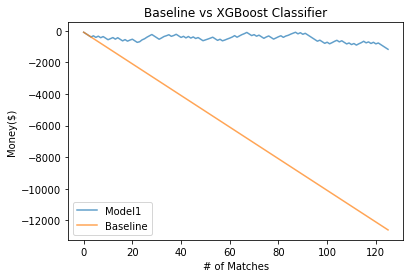

In [44]:
test_result.plot(y=["Model1", "Baseline"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [45]:
test_result = test_result.drop(['Model1','Baseline'], axis=1)

In [46]:
#betting on only 55% Confidence 
money = []
count = 0 
prob = 0.55

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.55'] = pd.Series(money)

In [47]:
#betting on only 60% Confidence 
money = []
count = 0 
prob = 0.6

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.6'] = pd.Series(money)

In [48]:
#betting on only 65% Confidence 
money = []
count = 0 
prob = 0.65

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.65'] = pd.Series(money)

In [49]:
#betting on only 70% Confidence 
money = []
count = 0 
prob = 0.7

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.7'] = pd.Series(money)

In [50]:
# hi_prob = 0.62
# print('MATCH_DATETIME > \'%s\'' % current_match_date)
# finq = fin.query('MATCH_DATETIME > \'%s\' & prob1>=%s' % (current_match_date, hi_prob))

# finq.tail(20)
# fin.tail(10)
# finq = finq.drop(['HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','OU25','prob0','Correct','PL 0.55','PL 0.6','PL 0.65','PL 0.7'], axis=1)
# finq

test_result

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_A_HKJC_HDC,STR_A_HKJC_H,STR_A_HKJC_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,HDA_RESULT,probA,probH,pred,Correct,PL 0.55,PL 0.6,PL 0.65,PL 0.7
0,1858641,2020-09-03 06:15:00,TEST,巴西甲,富明尼斯,戈亞尼恩斯,1.0,1.0,0.75,0.79,1.01,1.51,3.58,6.20,0.75,0.91,0.85,1.60,3.25,5.25,A,0.453526,0.546474,H,0,0.0,0.0,0.0,0.0
1,1896857,2020-09-03 07:30:00,TEST,美職業,紐約紅牛,華盛頓聯隊,0.0,1.0,0.75,0.99,0.81,1.72,3.67,4.00,None,None,None,1.68,3.65,3.95,A,0.348401,0.651599,H,0,-100.0,-100.0,-100.0,0.0
2,1896860,2020-09-03 08:30:00,TEST,美職業,肯薩斯體育會,FC達拉斯,1.0,1.0,0.75,0.89,0.91,1.65,3.71,4.40,None,None,None,1.65,3.70,4.05,A,0.498338,0.501662,H,0,-100.0,-100.0,-100.0,0.0
3,1880427,2020-09-03 09:00:00,TEST,墨西聯,阿美利加會,馬薩特蘭FC,3.0,1.0,0.75,0.78,1.02,1.58,3.92,4.65,0.75,0.9,0.86,1.63,3.65,4.25,H,0.696893,0.303107,A,0,-200.0,-200.0,-200.0,0.0
4,1880434,2020-09-04 10:00:00,TEST,墨西聯,帕丘卡,聖路易斯競技,3.0,1.0,0.75,1.00,0.80,1.75,3.58,3.87,0.75,1,0.77,1.67,3.45,4.25,H,0.424351,0.575649,H,1,-300.0,-200.0,-200.0,0.0
5,1837337,2020-09-04 23:00:00,TEST,智利甲,卡拉雷聯,科布雷索,2.0,2.0,0.75,0.88,0.92,1.67,3.61,4.35,0.75,0.9,0.86,1.62,3.55,4.45,A,0.360557,0.639443,H,0,-400.0,-300.0,-200.0,0.0
6,1908078,2020-09-05 00:30:00,TEST,英聯盃,米杜士堡,梳士貝利,4.0,3.0,0.50,0.79,1.01,1.78,3.43,3.97,None,None,None,1.50,3.75,5.30,H,0.319601,0.680399,H,1,-500.0,-300.0,-200.0,0.0
7,1908072,2020-09-05 20:00:00,TEST,英聯盃,基寧咸,修安聯,1.0,0.0,0.75,0.85,0.95,1.63,3.81,4.30,None,None,None,1.59,3.70,4.45,H,0.593811,0.406189,A,0,-500.0,-300.0,-200.0,0.0
8,1908087,2020-09-05 21:00:00,TEST,英聯盃,布里斯托城,埃克塞特,2.0,0.0,0.75,0.94,0.86,1.74,3.65,3.90,None,None,None,1.59,3.65,4.50,H,0.346443,0.653557,H,1,-500.0,-300.0,-200.0,0.0
9,1908058,2020-09-05 22:00:00,TEST,英聯盃,牛津聯,AFC溫布頓,1.0,1.0,0.75,0.85,0.95,1.63,3.93,4.15,None,None,None,1.62,3.70,4.25,A,0.410451,0.589549,H,0,-600.0,-300.0,-200.0,0.0


In [51]:
# final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL',
#             'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 
#             'STR_HDA_MACAU_H', 'STR_HDA_MACAU_D', 'STR_HDA_MACAU_A',
#             'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', 
#             'STR_HDA_HKJC_H', 'STR_HDA_HKJC_D', 'STR_HDA_HKJC_A', col_result]]


# final = final.query('ML_TYPE == "PREDICT"')

# y_pred = model1.predict(X_test)
# class_probabilities = model1.predict_proba(X_test)

# pred = pd.DataFrame(y_pred, columns=['pred'])
# prob = pd.DataFrame(class_probabilities, columns=['probA','probH'])

# final.reset_index(drop=True, inplace=True)
# pred.reset_index(drop=True, inplace=True)
# prob.reset_index(drop=True, inplace=True)

# fin = pd.concat([final, prob, pred], axis=1)

# fin = fin.query('MATCH_ID.notnull() & MATCH_DATETIME>\'%s\'' % current_match_date)

# fin.sort_values('MATCH_DATETIME')
# fin.reset_index(drop=True, inplace=True)

# fin

In [52]:
predict_result = test_result.query('ML_TYPE == "PREDICT"')
predict_result

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_A_HKJC_HDC,STR_A_HKJC_H,STR_A_HKJC_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,HDA_RESULT,probA,probH,pred,Correct,PL 0.55,PL 0.6,PL 0.65,PL 0.7
120,1936048,2020-10-07 18:00:00,PREDICT,日聯盃,川崎前鋒,FC東京,0.0,2.0,1.00,0.82,0.98,1.48,4.35,4.80,1.25,0.95,0.82,1.35,4.65,6.00,A,0.393923,0.606077,H,0,NaN,NaN,NaN,NaN
121,1936049,2020-10-07 18:00:00,PREDICT,日聯盃,橫濱水手,柏雷素爾,0.0,1.0,0.50,0.88,0.92,1.87,3.90,3.12,0.25,0.73,1.06,1.85,4.15,2.95,A,0.679164,0.320836,A,1,NaN,NaN,NaN,NaN
122,1858711,2020-10-08 07:30:00,PREDICT,巴西甲,聖保羅,戈亞尼恩斯,NaN,NaN,0.75,0.86,0.94,1.58,3.35,5.50,None,None,None,1.55,3.40,5.40,P,0.231369,0.768631,H,0,NaN,NaN,NaN,NaN
123,1932579,2020-10-08 07:30:00,PREDICT,美職業,哥倫布機員,蒙特利爾衝擊,NaN,NaN,1.00,0.74,1.06,1.42,4.40,5.50,None,None,None,1.37,4.30,6.25,P,0.628951,0.371049,A,0,NaN,NaN,NaN,NaN
124,1932581,2020-10-08 08:30:00,PREDICT,美職業,肯薩斯體育會,芝加哥火燄,NaN,NaN,0.75,0.94,0.86,1.72,3.83,3.73,0.75,0.88,0.88,1.60,3.95,4.10,P,0.368664,0.631336,H,0,NaN,NaN,NaN,NaN
125,1932583,2020-10-08 10:00:00,PREDICT,美職業,西雅圖海灣者,皇家鹽湖城,NaN,NaN,1.00,1.00,0.80,1.61,3.93,4.25,0.75,0.74,1.11,1.48,4.10,4.90,P,0.338256,0.661744,H,0,NaN,NaN,NaN,NaN


In [53]:
# col_ml_type = 'LOGREG'

# # Remove previous record
# sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in finq.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.6s finished


In [55]:
print('Cross-validation Best Score:', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model:', search.best_estimator_)

Cross-validation Best Score: 0.5568181818181819
Best Estimator: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_features': 3, 'randomforestclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=3, min_samples_leaf=5,
                                        min_samples_split=3, n_jobs=-1,
                                        random_state=42))])
